<a href="https://colab.research.google.com/github/stefphd/bicycle-lnn/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagragian Neural Network for Bycicle Dynamics

This code identify the bicycle dynamics using a Lagragian Neural Network, with the method proposed in [this paper](https://arxiv.org/abs/2003.04630). This is similar to the DeLaN method (see [this papar](https://arxiv.org/abs/1907.04490)), with the difference that the method is suitable for system involving Lagragian of different forms, including e.g. non-holonomic contraints (as in the bicycle dynamics). The DeLaN method is instead confined to mechanical systems having potential and kinetic energy only (e.g. standard robots).

## Set the Python environment

Python 3.7 is being used for compatibility. Here the Python version is forced to be 3.7 (just installation and setting stuff).

In [1]:
!sudo apt update -y # update repos
!sudo apt install python3.7 # install python 3.7
from IPython.display import clear_output # just to clean the output of Colab
clear_output()
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1 # set installed python3.7 as python3
!sudo apt install python3-pip # install pip
!sudo apt install python3.7-distutils # install distutils according to the installer python version
clear_output()
!python3 --version # check the version

Python 3.7.17


# Install and Import Python Packages

Required Python packages are:

* jax (version 0.1.58) & jaxlib (version 0.1.36)
* numpy (included with jaxlib installation)

In [57]:
!pip install install --upgrade https://storage.googleapis.com/jax-releases/cuda101/jaxlib-0.1.36-cp37-none-linux_x86_64.whl
!pip install --upgrade -q jax==0.1.58

  Using cached https://storage.googleapis.com/jax-releases/cuda101/jaxlib-0.1.36-cp37-none-linux_x86_64.whl (48.2 MB)


In [58]:
# jax imports
import jax
import jax.numpy as jnp
from jax.example_libraries import stax
from jax.example_libraries import optimizers

# utils
import scipy.io as scio# to import mat files

# visualization
import matplotlib.pyplot as plt
from functools import partial # reduces args to function by making some subset implicit

## General inputs and settings

Below the general settings.

## Import the data

Experimental bicycle data are imported from a MAT file.

Text(0.5, 0, 'Time (s)')

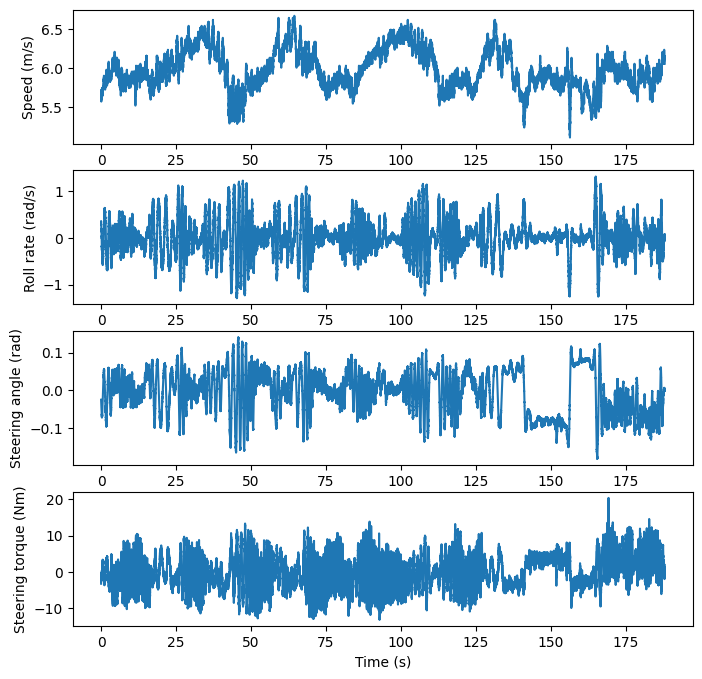

In [60]:
filename = "data/2022-09-14_FrequencyBand_20kph-test1.mat"
!mkdir -p data
!wget -O {filename} https://github.com/stefphd/bicycle-lnn/raw/main/{filename}
clear_output()
datamat = scio.loadmat(filename)

# get essential data
time = datamat["time"]; time = time - time[0]
speed = datamat["speed"]
gyrox = datamat["gyro_x"]
steerangle = datamat["steer_angle"]
steertorque = datamat["steer_torque"]

# some plots just to see the data

plt.figure(figsize=[8,8])

plt.subplot(4,1,1) # speed
plt.plot(time,speed)
plt.ylabel("Speed (m/s)")

plt.subplot(4,1,2) # roll rate
plt.plot(time, gyrox)
plt.ylabel("Roll rate (rad/s)")

plt.subplot(4,1,3) # steering angle
plt.plot(time, steerangle)
plt.ylabel("Steering angle (rad)")

plt.subplot(4,1,4) # steering torque
plt.plot(time, steertorque)
plt.ylabel("Steering torque (Nm)")

plt.xlabel("Time (s)")
